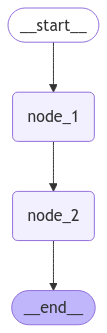

node_1 executed {'messages': []}
node_2 executed {'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='57157e02-dbc3-4940-b0f6-805e173a0c54')], 'foo': 'bar'}


{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='57157e02-dbc3-4940-b0f6-805e173a0c54'),
  HumanMessage(content='another message', additional_kwargs={}, response_metadata={}, id='3c8c0282-fc1a-45b6-93bb-404eca155efd')]}

In [29]:
from langgraph.graph import StateGraph, START, END, MessagesState
from typing_extensions import TypedDict
from IPython.display import Image

class State(TypedDict):
  messages: MessagesState
  foo: str

graphBuilder = StateGraph(MessagesState)

#node 1
def node_1(state: State):
  print("node_1 executed", state)
  return {"messages": ["hello"], "foo": "bar"}

#node 2
def node_2(state: State):
  print("node_2 executed", state)
  return {"messages": ["another message"]}

graphBuilder.add_node("node_1", node_1)
graphBuilder.add_node("node_2", node_2)


graphBuilder.add_edge(START, "node_1")
graphBuilder.add_edge("node_1", "node_2")
graphBuilder.add_edge("node_2", END)

graph = graphBuilder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))
newState = graph.invoke({"messages": [], "foo": "quejeso"})
newState

As you can see, the state is updated with the messages but the foo property is not.